In [19]:
import torch 
from torch import nn
import numpy as np
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
import PIL
import matplotlib.pyplot as plt

In [20]:
transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [21]:
data = datasets.ImageFolder(root="data",
                            transform=transform)

In [17]:

data_loader = DataLoader(data,
                        10,
                        True,
                        num_workers=os.cpu_count())

In [5]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [6]:
def train_step(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                device: torch.device= device):
    ## training
    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred , y)

        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    return train_loss, train_acc

In [7]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=(3, 3), padding=0),
            nn.ReLU(),
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3, 3), padding=0),
            nn.ReLU(),
            nn.MaxPool2d((2, 2))
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3, 3), padding=0),
            nn.ReLU(),
        )
        self.conv_block_4 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3, 3), padding=0),
            nn.ReLU(),
            nn.MaxPool2d((2, 2))
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 13 * 13, out_features=output_shape)
        )
    def forward(self, x):
        return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))

In [8]:
# model = TinyVGG(3, 16, 3).to(device)

In [9]:
# optim = torch.optim.Adam(params=model.parameters(), lr=0.001)
# loss_function = nn.CrossEntropyLoss()

In [10]:
# for _ in range(1):
#     t1, t2 = train_step(model, data_loader, loss_function, optim, device)
#     print(f" {_} the train loss {t1} | train acc {t2}")

In [11]:
# with open('model_state.pt', 'wb') as f:
#     torch.save(model.state_dict(), f)

In [12]:
model_test = TinyVGG(3, 16 , 3)
with open('model_state.pt', 'rb') as f:
    model_test.load_state_dict(torch.load(f))

In [24]:
imgs_list = list(os.listdir('test/'))

C:\Users\Ahmed Rabie\AppData\Local\Temp\ipykernel_5316\2116272027.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1)


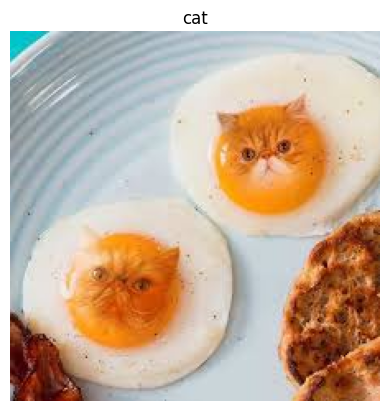

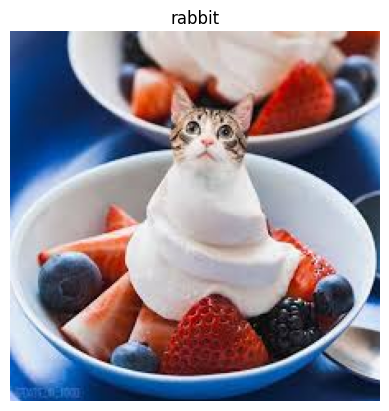

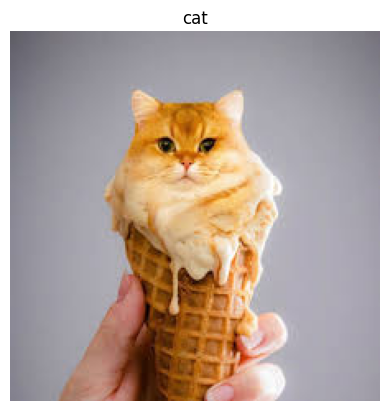

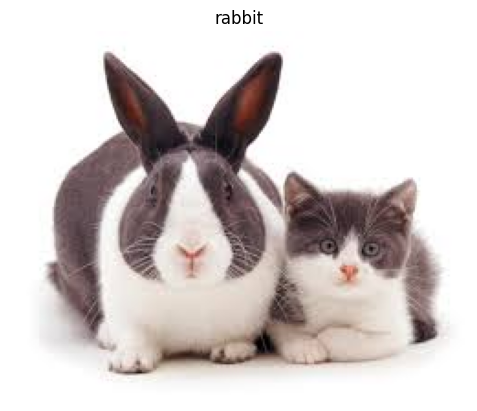

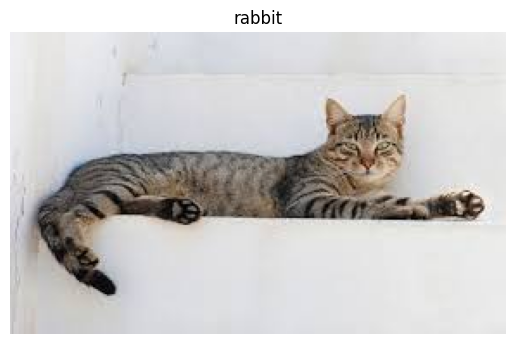

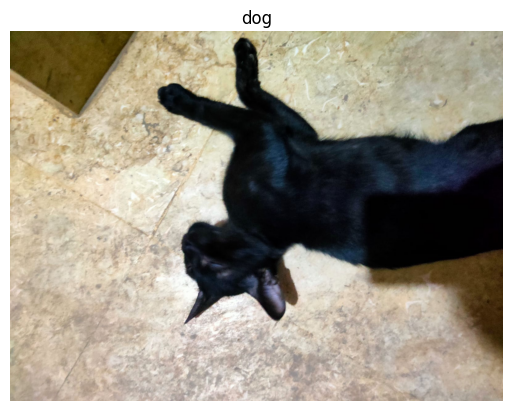

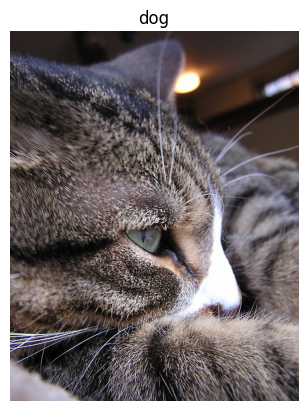

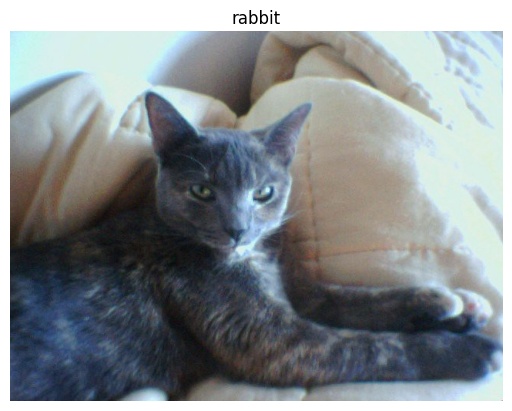

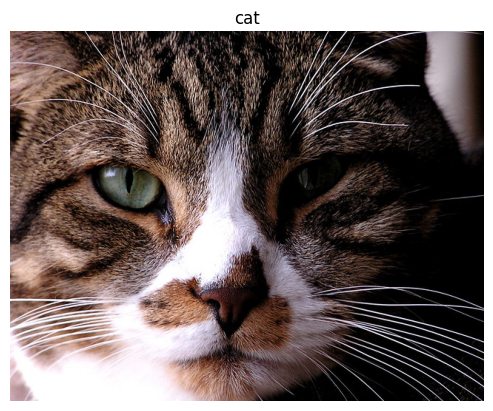

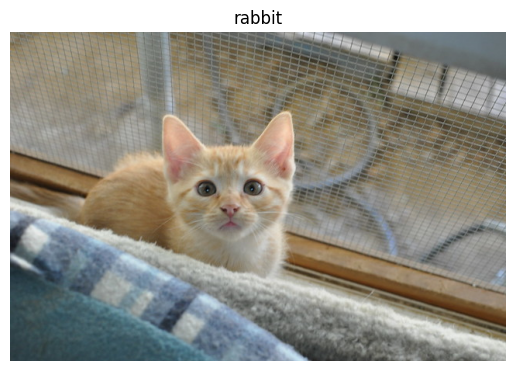

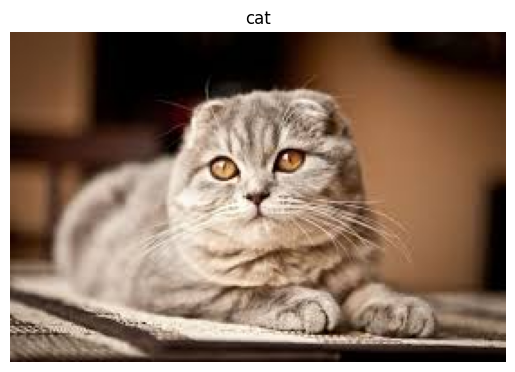

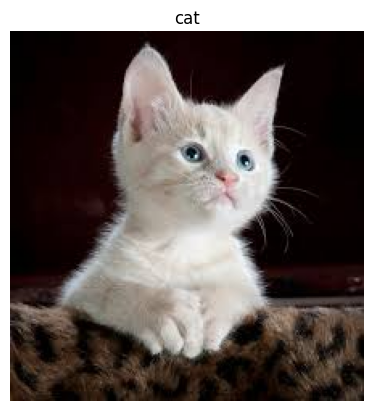

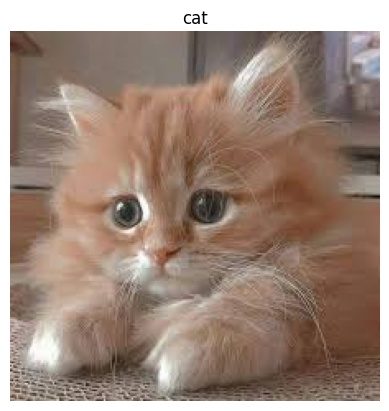

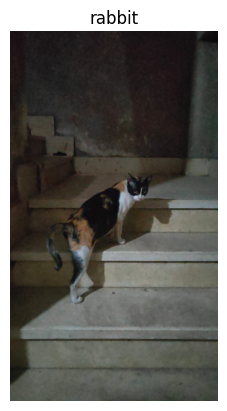

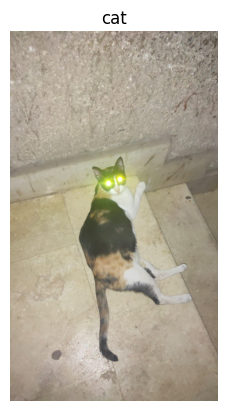

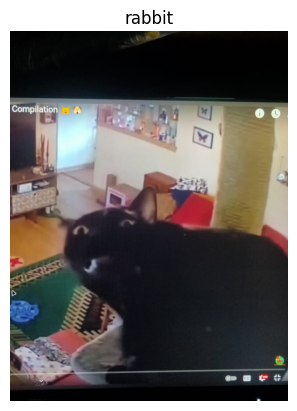

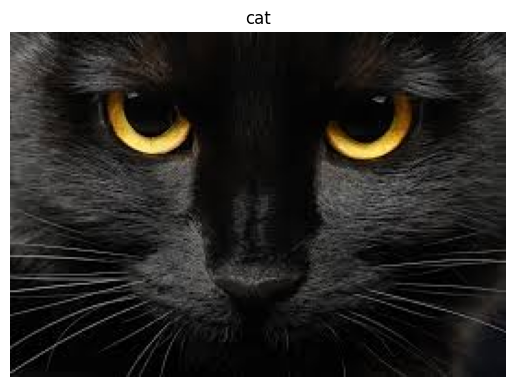

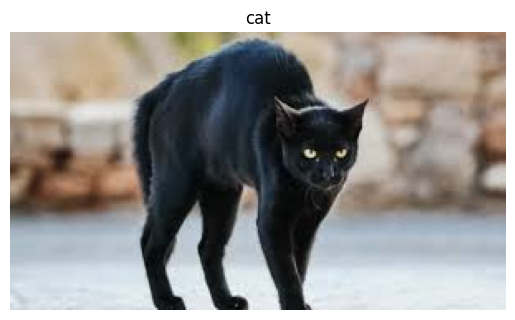

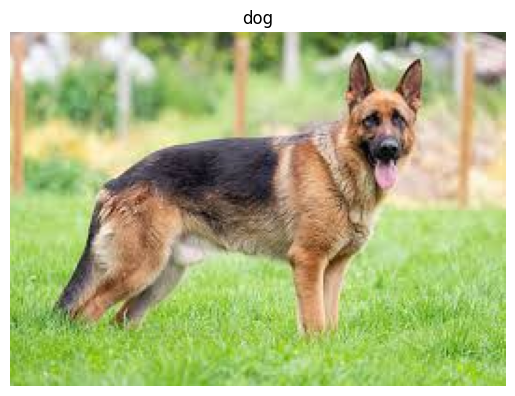

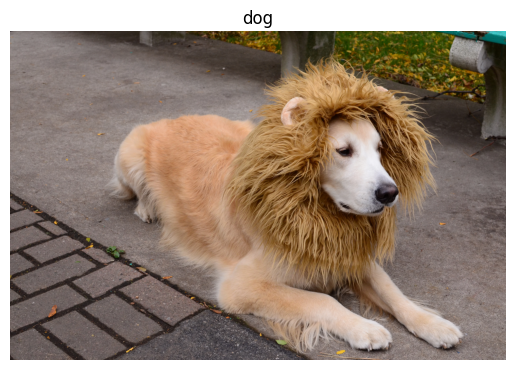

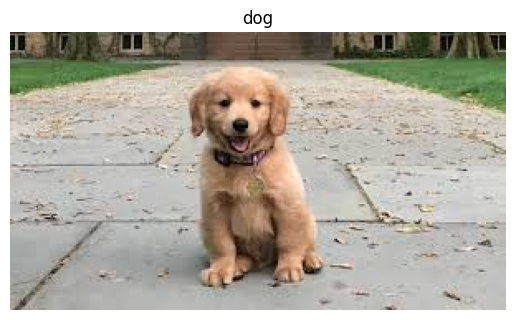

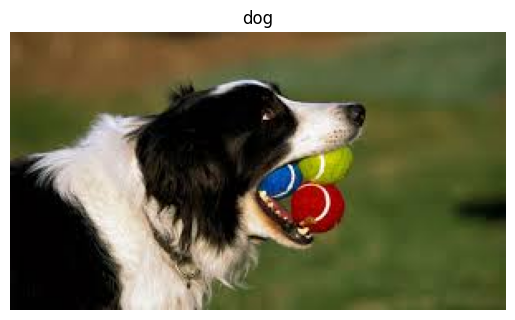

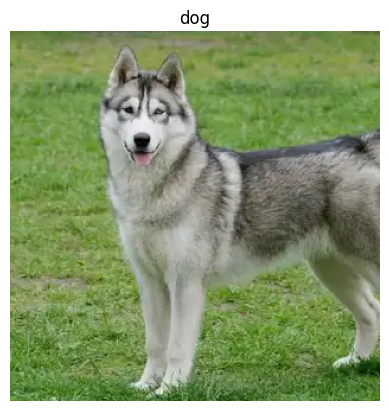

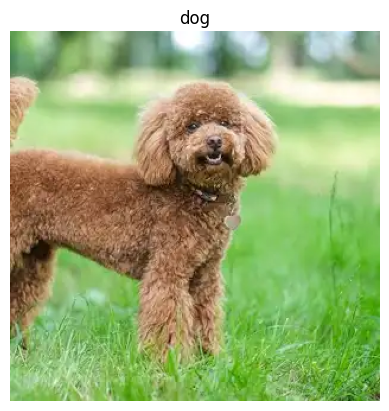

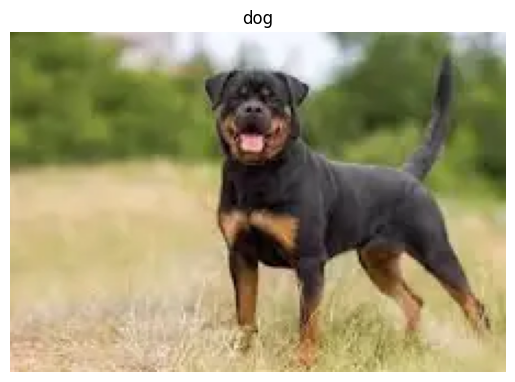

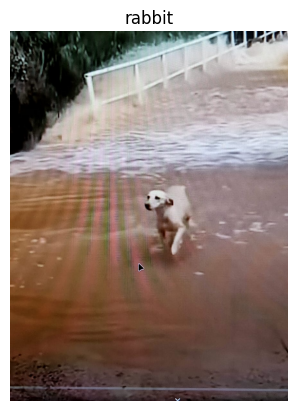

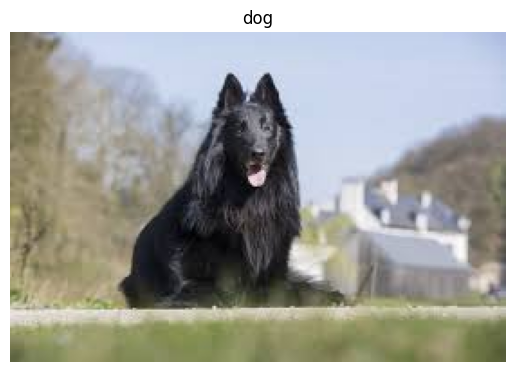

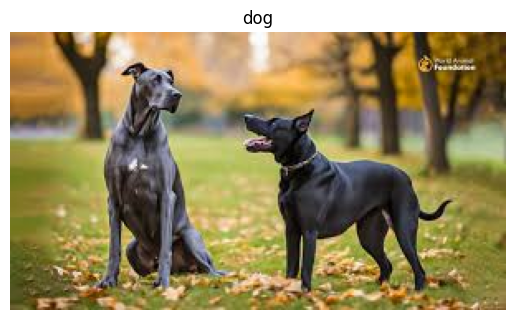

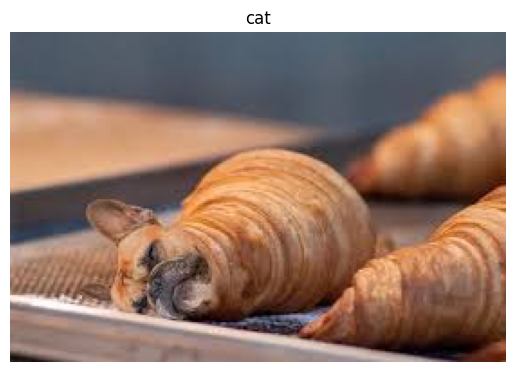

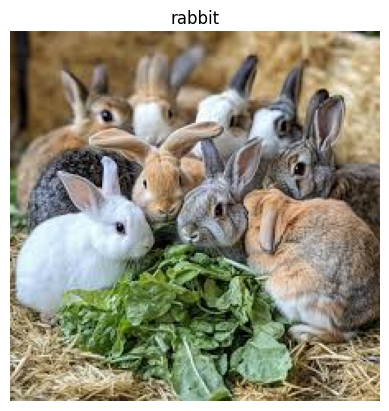

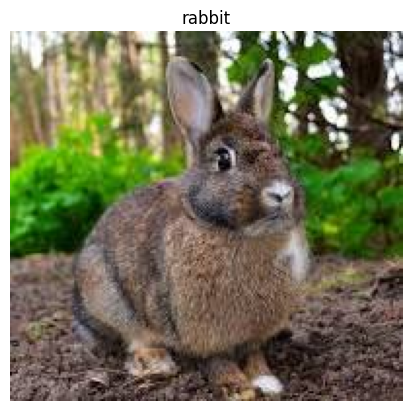

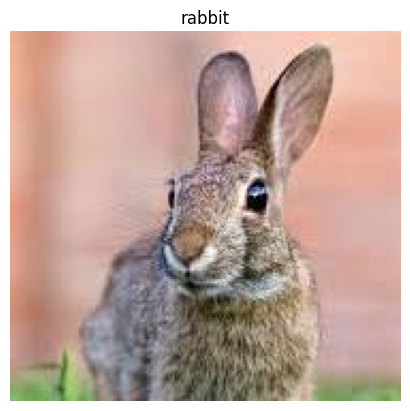

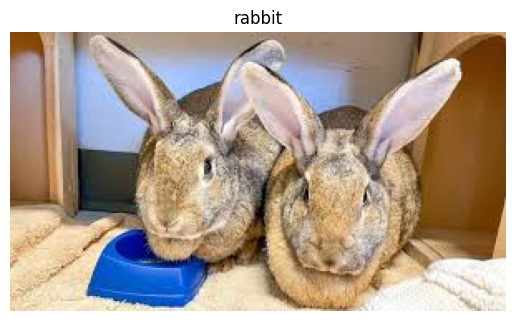

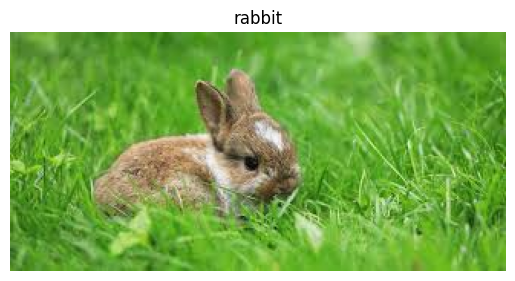

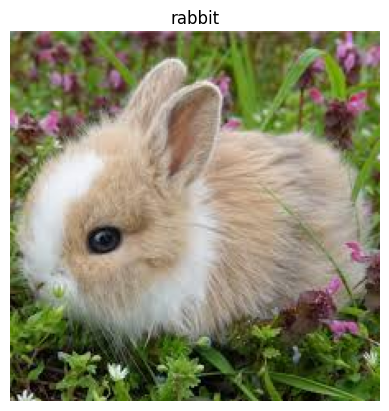

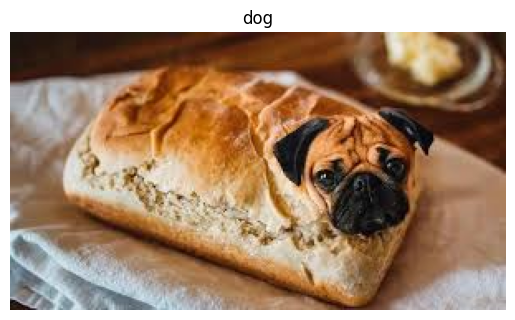

In [25]:
for path in imgs_list:
    fig, ax = plt.subplots(1, 1)
    ax.axis(False)
    path = 'test' + '/' + path 
    im = PIL.Image.open(path)
    img = PIL.Image.open(path)
    t = transform(img)
    t = t.unsqueeze(0)
    ax.set_title(data.classes[torch.argmax(model_test(t)).numpy()])
    ax.imshow(im)
    